In [46]:
import numpy as np
import matplotlib.pyplot as plt
from  scipy.stats import spearmanr

In [3]:
data = np.load('/home/aleksejs/Downloads/cell257.npy')

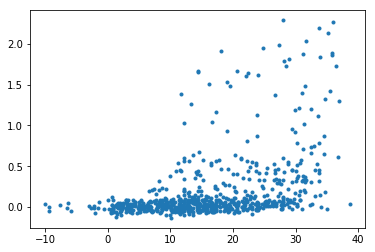

In [6]:
x, y = data[1], data[0]

plt.figure()
plt.plot(x, y, '.')
plt.show()

In [47]:
'''
1. Split range into 10 intervals
2. Resample 10 points from each interval
3. Fit line
4. Bootstrap 2.-3., compute inclination
5. Test
'''

# 0.5 Find boundaries
N = 10
yMin = np.min(y)
yMax = np.max(y)
boundaries = np.linspace(yMin, yMax, N+1)[1:]

boundaries

# 1. Split data into bins

xLst = []
yLst = []
for i in range(N-1):
    l = boundaries[i]
    r = boundaries[i+1]
    dataIdx = np.logical_and(y >= l, y < r)
    xLst += [x[dataIdx]]
    yLst += [y[dataIdx]]
    
# plt.figure()
# for d in dataLst:
#     plt.plot(d)
# plt.show()

def resample(xLst, yLst, n):
    if n >= len(xLst):
        return np.array(xLst), np.array(yLst)
    else:    
        idxs = np.random.randint(0, len(xLst), n)
        return xLst[idxs], yLst[idxs]

fitLst = []
spLst = []
for iTest in range(1000):  # 4.
    xSample = []
    ySample = []
    for i in range(len(xLst)): # 2.
        x, y = resample(xLst[i], yLst[i], 10)
        xSample += [x]
        ySample += [y]
    
    xSample = np.concatenate(xSample)
    ySample = np.concatenate(ySample)
    fitLst += [np.polyfit(xSample, ySample, 1)]     # 3.
    spLst += [spearmanr(xSample, ySample)[1]]

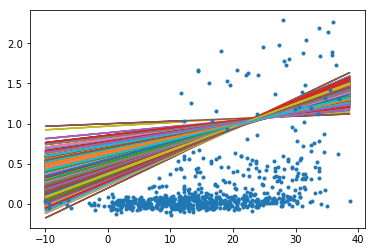

In [50]:
# 5.
# a, b = np.mean(fitLst, axis=0)
x, y = data[1], data[0]

plt.figure()
for a, b in fitLst:
    plt.plot(x, a*x+b)
plt.plot(x, y, '.')
plt.show()

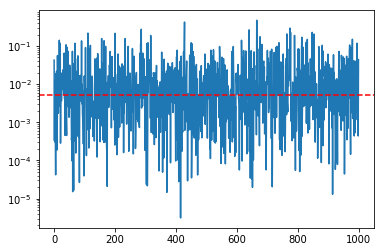

In [61]:
from scipy.stats import gmean
spMean = gmean(spLst)

plt.figure()
plt.semilogy(spLst)
plt.axhline(y=spMean, color='r', linestyle='--')
# plt.hist(spLst, bins='auto')
# plt.xscale('log')
plt.show()

In [56]:
np.mean(fitLst, axis=0)

array([0.02310688, 0.50558354])

In [58]:
spMean

0.0051507692293704015

In [38]:
np.sum([min(len(l), 10) for l in dataLst])

76